# Species filtering
We will filter out species whose **relative abundance does not exceed 0.001 in any sample**. This **criterion** is derived from the study by **Zeller et al., the same study** that provided the dataset [@zeller2014potential].

After applying this abundance filter, the dataset is reduced to **491 species**. We will now proceed with model development using these filtered species.

In [27]:
#| echo: false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# loading tab-seperated data file using pandas and transposing it
data = pd.read_csv('Nine_CRC_cohorts_taxon_profiles.tsv',sep='\t',header=None).T

# setting the first row as column names and then removing it
data = data.rename(columns=data.loc[0]).drop(0, axis=0)

# accessing Zeller et al., 2014 dataset
zeller_db = data.loc[data['dataset_name'] == 'ZellerG_2014',:]

# fetching microbacterial organism information-related columns
bacteria_colnames = [col for col in data.columns if 'k__Bacteria' in col]

# metadata colnames
metadata_colnames = ['dataset_name', 'sampleID', 'subjectID', 'body_site', 'study_condition',
                     'disease', 'age', 'age_category', 'gender', 'country','ajcc','alcohol',
                     'antibiotics_current_use','curator','disease_subtype','ever_smoke','fobt',
                     'hba1c','hdl','ldl','location','BMI']

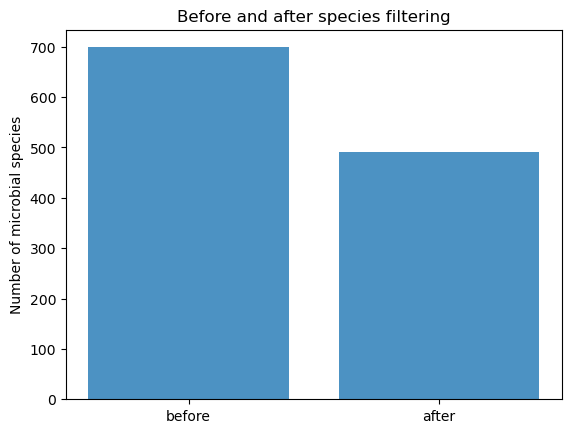

In [28]:
#| label: fig-filtering
#| fig-cap: "Before and after species filtering"

import numpy as np
import matplotlib.pyplot as plt

# dataset containing only bacterial microoganism's relative abundace
microbiome = zeller_db[bacteria_colnames]

# converting data types
for col in microbiome:
    microbiome.loc[:,col] = pd.to_numeric(microbiome[col], errors='coerce')

# fetching names of columns with abundance exceeding .001
columns_to_fetch = microbiome.columns[microbiome.max(axis=0) > 0.001]

# filtering dataset
microbiome_filtered = microbiome[columns_to_fetch]

plt.figure()
plt.bar([1,2],[len(microbiome.columns),len(columns_to_fetch)],alpha=.8)
plt.xticks([1,2],['before','after'])
plt.ylabel('Number of microbial species')
plt.title('Before and after species filtering')
plt.show()


## References